# Exercise: Fitting spectral lines

In this exercise we will be fitting Gaussian functions to spectral lines of the $\rm H_I$ transition of the Hydrogen atom. This is a forbidden transition that occurs as a result of its hyperfine structure.


Let us assume the spin of the p+ is down, then the $\rm H_I$ transition occurs when the spin of the electron flips from up to down (i.e. when going from anti-parallel to parallel). The spin up configuration has a slightly higher energy than the spin down because the magnetic dipole moments are parallel, so when it flips it releases a low-energy photon and goes into the spin down configuration, which has lower energy as the the magnetic dipole moments are anti-parallel.


**And some nice extra details from Wikipedia:**

"This transition is highly forbidden with an extremely small transition rate of $2.9\times 10^{-15}\,\rm s^{-1}$ and a mean lifetime of the excited state of around 10 million years. A spontaneous occurrence of the transition is unlikely to be seen in a laboratory on Earth, but it can be artificially induced using a hydrogen maser. It is commonly observed in astronomical settings such as hydrogen clouds in our galaxy and others. Because of its long lifetime, the line has an extremely small natural width, so most broadening is due to Doppler shifts caused by bulk motion or nonzero temperature of the emitting regions."

The transition.


- At 21 cm, 1.4 GHz.


- The data are taken from the GASS survey (shared via private communication).


- This survey uses the Parkes telescopes in Australia.


If you are interested in more information, I am leaving the links below:

Parkes: https://www.parkes.atnf.csiro.au/

On 





In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.modeling import models, fitting
from astropy.modeling.models import Gaussian1D

## Gaussian fit for spectra

This data is a measurment of the 21 cm neutral hydrogen line from the Galaxy at a certain line of sight

In [2]:
spectra = pd.read_csv('104444.9-264831_gass_spectrum.txt', sep='\t')

print(spectra)

velocity  = spectra['velocity']
intensity = spectra['Tb'] # brightness temperature

     Unnamed: 0    velocity        Tb
0             0 -494.424011 -0.004997
1             1 -490.500011  0.010002
2             2 -486.576011  0.017502
3             3 -482.652011  0.027504
4             4 -478.728011 -0.014999
..          ...         ...       ...
248         248  478.727995  0.002502
249         249  482.651995 -0.012497
250         250  486.575995  0.007500
251         251  490.499995 -0.017502
252         252  494.423995 -0.044998

[253 rows x 3 columns]


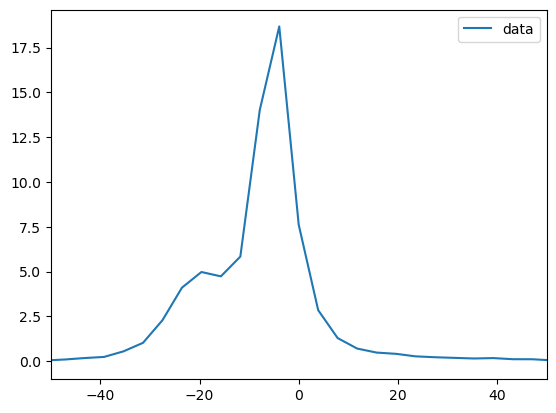

In [3]:
fig, ax = plt.subplots()

plt.plot(velocity, intensity, label = 'data')
plt.legend()
ax.set_xlim(-50, 50)
plt.show()

In [4]:
from scipy.optimize import curve_fit

#define a function to fit to the data
def func(x, a, b):
    return a * np.exp(-b*x**2)

coef, cova = curve_fit(func, velocity, intensity)

print(coef)

#print(cova)

#print('y = %.5f * %.5f t^2' % (coef[0]), (coef[1]))

[9.56176235e+00 4.34669607e-03]


/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


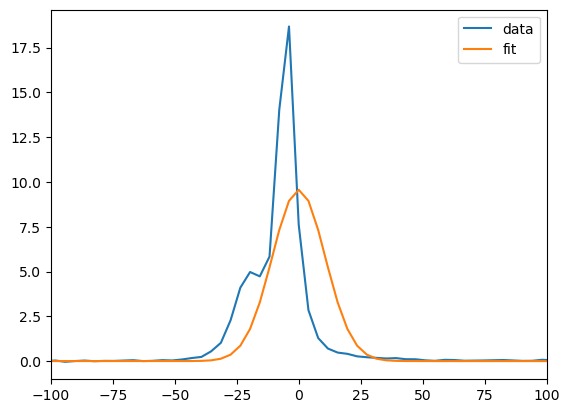

In [5]:
fig, ax = plt.subplots()

ax.plot(velocity, intensity, label = 'data')
ax.plot(velocity, coef[0] * np.exp(-coef[1]*velocity**2), label = 'fit')
plt.legend()
ax.set_xlim(-100, 100)
plt.show()

## Levenberg-Marquardt algorithm and least squares statistic

- Uses the lm method to minimise a functional form, which you define as a model.


- You can usually model spectra with Gaussians


- You need a library called astropy for this.


See documentation: https://docs.astropy.org/en/stable/api/astropy.modeling.fitting.LevMarLSQFitter.html

In [6]:
from astropy import modeling

fitter = fitting.LevMarLSQFitter()

model = models.Gaussian1D()   # depending on the data you need to give some initial values

fitted_model = fitter(model, spectra['velocity'], spectra['Tb'])

print(fitted_model)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev     
    ------------------ ------------------ -----------------
    17.288960292672286 -5.342927105142662 4.825836639659604


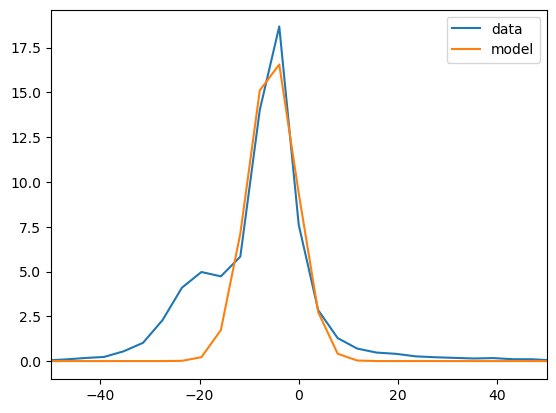

In [7]:
fig, ax = plt.subplots()
plt.plot(spectra['velocity'], spectra['Tb'], label = 'data')
plt.plot(spectra['velocity'], fitted_model(spectra['velocity']), label = 'model')
plt.legend()
ax.set_xlim(-50, 50)
plt.show()

In [8]:
def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [9]:
gg_init = models.Gaussian1D() + models.Gaussian1D()

fitted_model_2 = fitter(gg_init, spectra['velocity'], spectra['Tb'])

print(fitted_model_2)

Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=15.03270308, mean=-4.76051918, stddev=2.9898737)>

    [1]: <Gaussian1D(amplitude=5.34559069, mean=-11.97532007, stddev=12.2413779)>
Parameters:
       amplitude_0          mean_0       ...        mean_1            stddev_1     
    ----------------- ------------------ ... ------------------- ------------------
    15.03270307986912 -4.760519179829358 ... -11.975320068063759 12.241377902742089


In [10]:
print(fitted_model_2[0])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev      
    ----------------- ------------------ ------------------
    15.03270307986912 -4.760519179829358 2.9898737010482117


In [11]:
print(fitted_model_2[1])

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ----------------- ------------------- ------------------
    5.345590692482743 -11.975320068063759 12.241377902742089


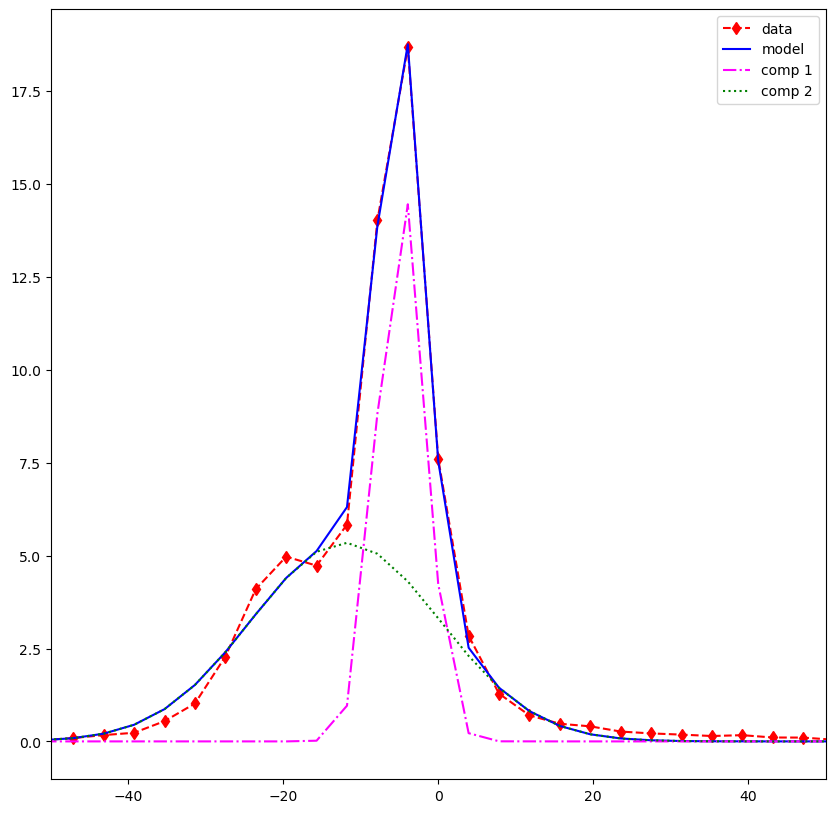

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(velocity, spectra['Tb'], label='data', color = 'red', marker = 'd', linestyle = '--')
ax.plot(velocity, fitted_model_2(spectra['velocity']), label='model', color = 'blue', linestyle = '-')

ax.plot(velocity, gauss(spectra['velocity'], 15.03270307986912, -4.760519179829358, 2.9898737010482117), label='comp 1', color = 'magenta', linestyle = '-.')
ax.plot(velocity, gauss(spectra['velocity'], 5.345590692482743, -11.975320068063759, 12.241377902742089), label='comp 2', color = 'green', linestyle = ':')

ax.legend()
ax.set_xlim(-50, 50)
plt.show()
